In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import pandas as pd

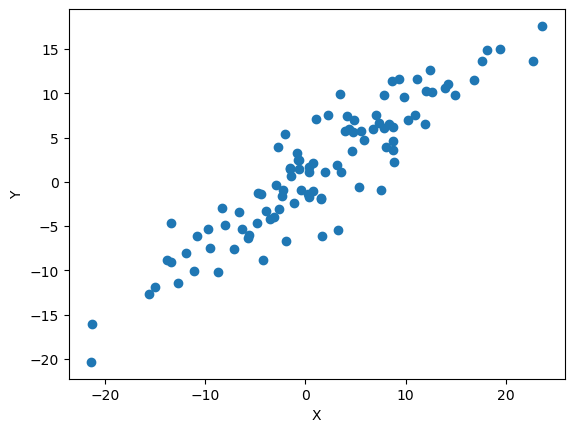

In [2]:
df = pd.read_csv('ejercicio_1.csv')
x=df["X"]
y=df[" Y"]
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
MXT=np.array([x])
MX=MXT.transpose()
INV=MXT@MX
INV=np.linalg.inv(INV)
yv=(np.array([y])).transpose()
B=INV@MXT@yv
BP=B[0][0]

def fl(x, b):
    return b * x

yp=BP*x



Cuando guardamos la matriz de la manera que lo hicimos, se guarda transpuesta, por lo que al transponerlo nos da la matriz X. Luego en INV guardamos la inversa de la multiplicacion MtM. En yv guardamos el vector y. En B guardamos el vector B que calculamos con la cuenta que conseguimos en el inciso F. En este caso BP es el valor puesto que B esta en R1

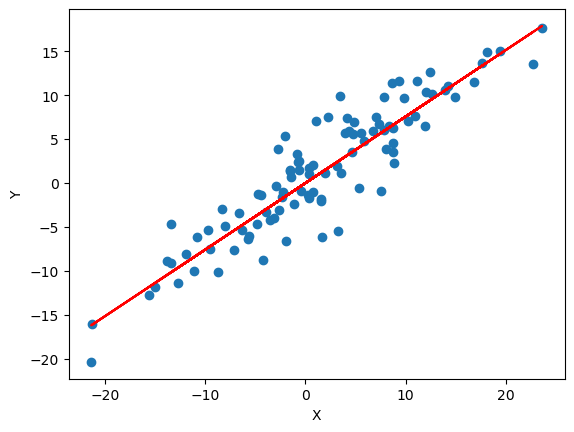

In [4]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,yp,color="red")
plt.show()

In [8]:
yv12=(np.array([y+12])).transpose()
B12=INV@MXT@yv12
BP12=B12[0][0]
def fl(x, b):
    return b * x 
yp12=BP12*x


Guardamos el vector y + 12 en yv12. Calculamos el nuevo Beta con el vector cambiado.

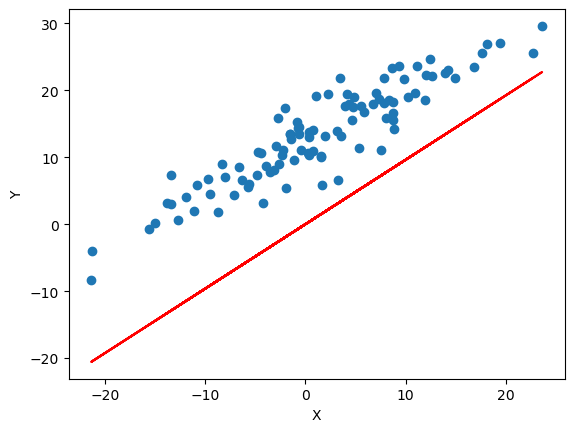

In [9]:
plt.scatter(x,y+12)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,yp12,color="red")
plt.show()

Esta aproximacion no es buena. El problema con esta es que cuando se hace este tipo de regresion, no se esta teniendo el cuenta la ordenada al origen. Como todos los puntos aumentan en 12 unidades en el punto Y, la ordenada al origen tambien aumenta en 12. En nuestra regresion no tenemos ningun parametro para la ordenada al orige. Esto se podria solucionar agregando un B0 que sea la ordenada al origen para poder estabilizar el grafico.

Para calcular B0 agregamos una columna de unos adelante de la matriz x. Agregamos una columna de unos para que cuando hagamos X*B=>

| B0 + B1*x11 + ... + BP*x1p |
| B0 + B1*x21 + ... + BP*x2p |
|..
|..
| B0 + B1*xn1 + ... + BP*xnp |

En este caso tendriamos solo B0 y B1.

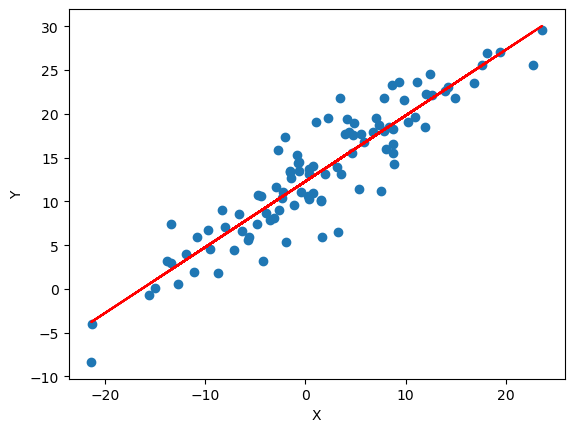

In [11]:

C1=np.full([100,1],1)
aux=np.array([x]).transpose()

M=np.hstack((C1,aux))
MT=M.transpose()
In=MT@M
In=np.linalg.inv(In)
B=In@MT@yv12
B0=B[0][0]
B1=B[1][0] 
yg=B1*x+B0


plt.scatter(x,y+12)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,yg,color="red")
plt.show()

En esta instancia, agregamos la columna de 1s a la matriz y graficamos usando B0 como ordenada y B1 como pendiente.

A partirde ahora usaremos b0 para hacer los graficos.

In [9]:
df2=pd.read_csv('ejercicio_2.csv')
Y2=df2[" Y"]
X2=df2["X"]
y2=np.array([Y2]).transpose()
Uno=np.ones([75,1])
A=np.array([X2]).transpose()
A=np.hstack((Uno,A))
AT=A.transpose()
IA=np.linalg.inv(AT@A)
B2=IA@AT@y2
B1obs=B2[1][0]
B0obs=B2[0][0]

Yobs=X2*B1obs+B0obs

(75, 2)
[[ 6.03302742]
 [-0.7470797 ]]


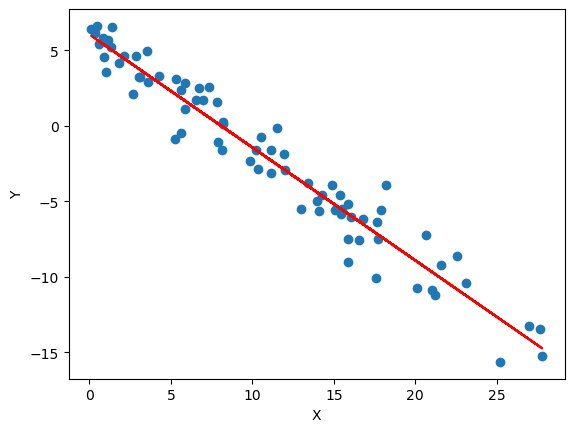

In [10]:
plt.scatter(X2,Y2)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X2,Yobs,color="red")
plt.show()

Si agarramos un valor de X muy elevado, generaria un valor de Y muy bajo. Si por ejemplo, se estuviese midiendo la temperatura, un valor muy grande en los numeros negativos no tendria sentido, por lo que seria una mala aproximacion. Ese punto con un X muy grande seria un Outlier.

In [11]:
datos=pd.read_excel("casas.xlsx")
casas=(datos.to_numpy())
y=casas[:,7]
casas=casas[:,[0,1,2,3,4,5,6]]
Unos=np.ones([414,1])
casas=np.hstack((Unos,casas))

ent=casas[0:316]
test=casas[316:415]
print(test.shape)
ye=y[0:316]
yt=y[316:415]

(98, 8)


In [12]:
entT=ent.transpose()
Ine=entT@ent
Ine=np.linalg.inv(Ine)
Be=Ine@entT@ye

yeobs=ent@Be

i=0
ecm=0
while i<316:
    ecm+=(ye[i]-yeobs[i])**2
    i+=1
ecm=ecm/316
print(ecm)


82.96351346842921


In [13]:
ytobs=test@Be
print(yt.shape)
ecmt=0
i=0
while i<98:
    ecmt+=(yt[i]-ytobs[i])**2
    i+=1
ecmt=ecmt/98
print(ecmt)

(98,)
58.22951158259594


In [14]:
casasT=casas.transpose()
ctc=casasT@casas
ctc=np.linalg.inv(ctc)
Btotal=ctc@casasT@y
ytobs=test@Btotal
i=0
ecmtotal=0
while i<98:
    ecmtotal+=(yt[i]-ytobs[i])**2
    i+=1
ecmtotal=ecmtotal/98
print(ecmtotal)


57.120619828531694


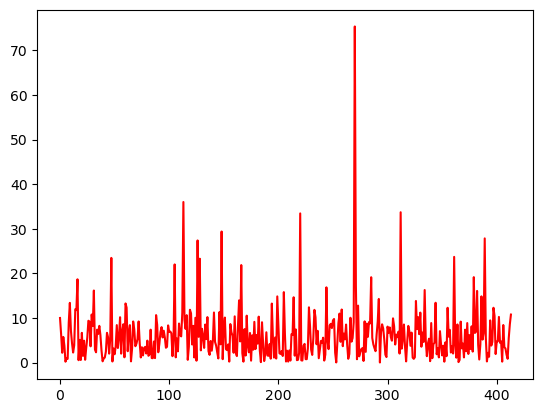

In [16]:
yobs=casas@Btotal
dif=abs(y-yobs)
ncasas=range(414)

plt.plot(ncasas,dif,color="red")
plt.show()

Si agregaramos una columna que indicase el año de construccion de cada casa, esa columna no estaria agregando nada de informacion, puesto que la columna de edad de las casas me da esa misma informacion. Agregar una columna que no genera nueva informacion no mejora el modelo.